# Chapter 1 - Walk-through example

All code and datasets from the O'Reilly Book can be downloaded here:
[https://github.com/ageron/handson-ml2](https://github.com/ageron/handson-ml2)

## Step 1: Import necessary Python libraries and ML Frameworks
Python's main scientific libraries are NumPy, pandas, and Matplotlib.

- **NumPy** (Short for Numerical Python)
Numpy is used for working with arrays. [For more info visit NumPy tutorials](https://www.w3schools.com/python/numpy/default.asp)
- **pandas** is used to analyse data. [For more info visit the pandas site](https://pandas.pydata.org/docs/user_guide/index.html)
- **Matplotlib** is a graph plotting library and helps with data visualisation. [For more info visit Matplotlib tutorials](https://www.w3schools.com/python/matplotlib_intro.asp)

- **[Scikit-Learn](https://scikit-learn.org)** is a production ready Python framework (built on NumPy, SciPy and Matplotlib) that implements many ML algorithms.

In [2]:
# import Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the Scikit-Learn Framework NB: ≥0.20 is required
import sklearn
# Python's assert statement is included to return an error to make this easy to debug
assert sklearn.__version__ >= "0.20", 'You need version 0.2 or greater of Scikit-Learn'

#### Import two of Scikit-Learn's algorithms for comparison
* MODEL BASED LEARNING - The Linear model contains a set of methods intended for regression in which the target value is expected to be a linear combination of the features.
For more info visit [Scikit-Learn > Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
* INSTANCE-BASED LEARNING - The K-Nearest Neighbours - Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.
For more info visit [Scikit-Learn > Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

In [3]:
# Import the Scikit-Learn models that you intend to use
import sklearn.linear_model
import sklearn.neighbors

---
## Step 2: Create any functions that you will use throughout your application
This function merges the OECD's Better life data and the IMF's GDP per capita data.
Click here for more information on [Python functions](https://www.w3schools.com/python/python_functions.asp)

In [4]:
# This function merges the OECD's life satisfaction data and the IMF's GDP per capita data.
def prepare_country_stats(oecd_bli, gdp_per_capita, feature):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", feature]].iloc[keep_indices]

---
## Step 3: Download the data
Download the OECD's Better Life Index data and the IMF's stats about gross domestic product (GDP) per capita.

In [5]:
# os is the Python module for working with the operating system
# Set 'datapath' so that the datasets are automatically downloaded to a subfolder 'lifesat'
import os
datapath = os.path.join("datasets", "lifesat", "")

# urllib is Python's URL handling module
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

---
## Step 4: Load the data
Load the data in a Dataframe using pandas [read_CSV](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#) function.

In [6]:
# Load the data with PANDAS
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# CHECK - display the first few rows of the OECD DataFrame using the head() method.
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [7]:
# What are all the possible indicators of 'Better Life'?
all_features = oecd_bli["Indicator"].unique()
print(all_features)

['Dwellings without basic facilities' 'Housing expenditure'
 'Rooms per person' 'Household net adjusted disposable income'
 'Household net financial wealth' 'Employment rate' 'Job security'
 'Long-term unemployment rate' 'Personal earnings'
 'Quality of support network' 'Educational attainment' 'Student skills'
 'Years in education' 'Air pollution' 'Water quality'
 'Consultation on rule-making' 'Voter turnout' 'Life expectancy'
 'Self-reported health' 'Life satisfaction' 'Assault rate' 'Homicide rate'
 'Employees working very long hours'
 'Time devoted to leisure and personal care']


In [8]:
# What countries are included?
all_countries = oecd_bli["Country"].unique()
print(all_countries)

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'United Kingdom' 'United States' 'Brazil' 'Chile'
 'Estonia' 'Israel' 'Russia' 'Slovenia' 'OECD - Total']


In [9]:
# CHECK - display the first few rows of the IMF DataFrame using the head() method.
print('IMF Data')
gdp_per_capita.head(5)

IMF Data


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [10]:
# Which countries are included in the IMF data?
imf_countries = gdp_per_capita["Country"].unique()
print(imf_countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'The Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Democratic Republic of the Congo'
 'Republic of Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'The Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong SAR' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Islamic Republic of Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' '

---
## Step 5: Prepare the data
In this step we use the already created function 'prepare_country_stats' to merge both datasets together
and create a dataframe with three columns: Country, GDP per capita, life satisfaction (or your chosen feature)

In [11]:
# Prepare the data
feature = "Life satisfaction"
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita, feature)

# CHECK - display the first few rows of the country_stats DataFrame using the head() method.
country_stats.head(5)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


---
## Step 6: Visulize the data


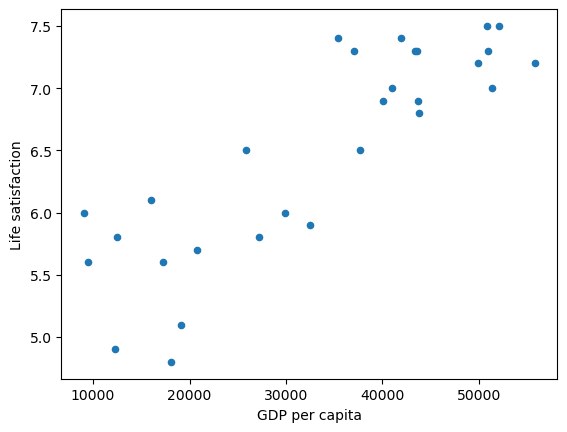

In [12]:
# Visualize the data by plotting the GDP per capita against your chosen feature
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats[feature]]
country_stats.plot(kind='scatter', x="GDP per capita", y=feature)
plt.show()

The scatter plot graph enables us to see that although the data is 'noisy' (i.e. partly random), it looks like life  satisfaction goes up more or less linearly as the Country's GDP per capita increases.  So you decide to model life satisfaction as a linear function of GDP per capita. 

## Step 7: Select model
In this example we shall compare the outputs of two types of regression models - linear and K-Nearest Neighbours (in this example k=3)

In [13]:
# Select the models

# Select the linear regression model with one attribute (GDP per capita)
model_l = sklearn.linear_model.LinearRegression()

# YOU DO YOURSELF - Select the k-nearest neighbour model (3-Nearest)
model_k = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

## Step 8: Train the model

In [14]:
# Train the Linear regression model
model_l.fit(x,y)

# YOU DO YOURSELF Train the K-nearest neighbour model
model_k.fit(x,y)

KNeighborsRegressor(n_neighbors=3)

## Step 9: Make a prediction
This step is called <i>inference</i>

For example, if we want to know how happy Cypriot's are but the OECD data does not have the answer, we can use our models to make a good prediction.

**i. First look up Cyprus's GDP per capita**

In [21]:
# look up this value from the IMF data -- NB: as this is a Pandas dataframe we use the pandas library
cyprus_gdp_per_capita = gdp_per_capita.at['Cyprus','GDP per capita']
print('Cyprus GDP per capita = ', cyprus_gdp_per_capita)

Cyprus GDP per capita =  22587.49


In [17]:
# Make a prediction for Cyprus using Linear Regression Model
X_new = [[cyprus_gdp_per_capita]]  # Cyprus' GDP per capita

cyprus_prediction = model_l.predict(X_new)
print(model_l.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96244744]]


In [18]:

# Make a prediction for Cyprus using the 3-Nearest Neighbors Regression model
#cyprus_prediction = model_k.predict(X_new)
print(model_k.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


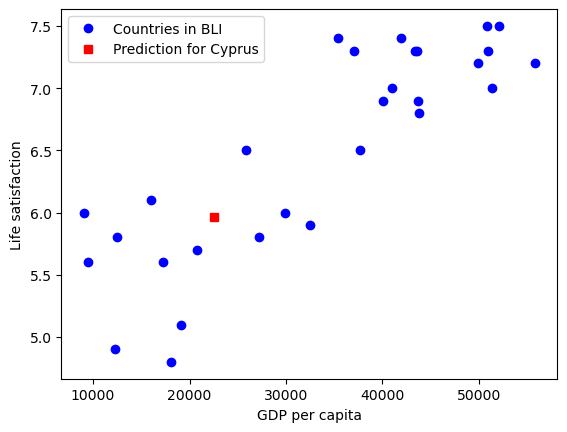

In [19]:
# plot all values from IMF
x1 = np.c_[country_stats["GDP per capita"]]
y1 = np.c_[country_stats[feature]]
# plot cyprus' position
x2 = cyprus_gdp_per_capita
y2 = cyprus_prediction
plt.plot(x1,y1, 'bo')
plt.plot(x2,y2, 'rs')
plt.xlabel('GDP per capita')
plt.ylabel(feature)
plt.legend(["Countries in BLI","Prediction for Cyprus"])
plt.show()